# 各种排序算法的代码实现

In [1]:
# 所有排序算法要调用的函数
def swap(data, i, j) -> None:
    data[i], data[j] = data[j], data[i]

## 选择排序

In [2]:
def select_sort(A, reverse=False):
    '''选择排序
    参数：
        data：待排序的列表
        reverse: 是否倒序排序，默认False
    返回值：
        已排序的列表
    '''
    data = list(A)
    
    lenData = len(data)
    
    for i in range(lenData):
        minInd = i
        for j in range(i+1, lenData):
            if data[j] < data[minInd]:
                minInd = j 
        swap(data, i, minInd)
    
    if reverse:
        data = data[::-1]
    return data

## 插入排序

In [3]:
def insert_sort(A, reverse=False):
    '''插入排序
    参数：
        data：待排序的列表
        reverse: 是否倒序排序，默认False
    返回值：
        已排序的列表
    '''
    data = list(A)
    
    lenData = len(data)
    
    for i in range(1, lenData):
        for j in range(i, 0, -1):
            if data[j] < data[j-1]:
                swap(data, j, j-1)
    
    if reverse:
        data = data[::-1]
    return data

## 冒泡排序

In [4]:
def bubble_sort(A, reverse=False):
    '''冒泡排序
    参数：
        data：待排序的列表
        reverse: 是否倒序排序，默认False
    返回值：
        已排序的列表
    '''
    data = list(A)
    
    lenData = len(data)
    
    for i in range(lenData-1):
        for j in range(lenData-1-i):
            if data[j] > data[j+1]:
                swap(data, j, j+1)
    
    if reverse:
        data = data[::-1]
    return data

## 快排
**基本原理**（分治法思想）  
1. 选定Pivot中心轴
2. 遍历尚未处理的数据（乱堆），将小于Pivot的数字放在Pivot左边（小堆），大于Pivot的数字放在Pivot右边（大堆）
3. 分别对左右子序列重复前两步操作

**使用装饰器实现尾递归优化** （避免数据过大时栈溢出）  
优化后仍然会栈溢出，尚不清楚原因

In [5]:
import sys

class TailRecurseException(Exception):
    def __init__(self, args, kwargs):
        self.args = args
        self.kwargs = kwargs

def tail_call_optimized(g):
    """
    This function decorates a function with tail call
    optimization. It does this by throwing an exception
    if it is it's own grandparent, and catching such
    exceptions to fake the tail call optimization.

    This function fails if the decorated
    function recurses in a non-tail context.
    """
    def func(*args, **kwargs):
        f = sys._getframe()
        if f.f_back and f.f_back.f_back \
            and f.f_back.f_back.f_code == f.f_code:
            # 抛出异常
            raise TailRecurseException(args, kwargs)
        else:
            while 1:
                try:
                    return g(*args, **kwargs)
                except TailRecurseException as e:
                    args = e.args
                    kwargs = e.kwargs
    func.__doc__ = g.__doc__
    func.__name__ = g.__name__
    return func


**快排的代码实现以及3种优化方式**

In [6]:
import random
# @tail_call_optimized
def quick_sort(A, reverse=False, optimize=0b111):
    '''快速排序
    参数：
        data：待排序的列表
        reverse: 是否倒序排序，默认False
        optimize: 采取哪些优化方案，默认采取所有优化方案
            * 0b100: 优化方案1 随机选取pivot
            * 0b010: 优化方案2 减少交换次数
            * 0b001: 优化方案3 当待排序区间较小时，改用插入排序
    返回值：
        已排序的列表
    '''
    data = list(A)
    
    lenData = len(data)
    quickSort(data, 0, lenData-1, optimize)
    
    if reverse:
        data = data[::-1]
    return data


def quickSort(data, l, r, opt=0b111):
    '''实现快速排序'''
    if l >= r: return
    
    if opt & 0b001 and r - l < 10: # 优化方案3 当待排序区间较小时，改用插入排序
        data[l:r+1] = insert_sort(data[l:r+1])
        return
    
    # 选取中心轴pivot
    if opt & 0b100: # 优化方案1 随机选取pivot
        randInt = random.randint(l, r)
        swap(data, l, randInt)
    pivot = data[l]

    # 以pivot为中轴将数据分成小堆和大堆
    i, j = l, r
    while i < j:
        if opt & 0b010: # 优化方案2 减少交换次数
            while data[j] >= pivot and i < j: j -= 1
            while data[i] <= pivot and i < j: i += 1
            if i<j: swap(data, i, j)
            else: swap(data, i, l) 
        else:
            while data[j] >= pivot and i < j: j -= 1
            swap(data, i, j) 

            while data[i] <= pivot and i < j: i += 1
            swap(data, i, j) 
            
        
    # 对Pivot左边和右边的数据进行同样的操作
    m = i
    quickSort(data, l, m-1, opt)
    quickSort(data, m+1, r, opt)

## 归并排序

In [7]:
from collections import deque
def merge_sort(A, reverse=False):
    '''归并排序
    参数：
        data：待排序的列表
        reverse: 是否倒序排序，默认False
    返回值：
        已排序的列表
    '''
    data = list(A)
    
    lenData = len(data)
    if lenData <= 1: return data
    
    m = lenData // 2
    L, R = merge_sort(data[:m]), merge_sort(data[m:])
    data = merge(L,R)
    
    if reverse:
        data = data[::-1]
    return data

def merge(L,R):
    res = []
    L, R = deque(L), deque(R)
    
    while L and R:
        min_v = L.popleft() if L[0] < R[0] else R.popleft()
        res.append(min_v)
    res += L if L else R
    return res

## 堆排

## 桶排序

# 准备数据

In [8]:
import random

def getData(N=5):
    # 1. 随机数据
    randomData = list(range(N))
    random.shuffle(randomData)

    # 2. 倒序数据
    reversedData = list(range(N-1,-1,-1))

    # 3. 几乎已经排序好的数据
    almostSortedData = list(range(N))
    almostSortedData[1],almostSortedData[-2] = almostSortedData[-2], almostSortedData[1]

    # 4. 已经排序好的数据
    sortedData = list(range(N))

    # 5. 全部重复的数据
    repeatData = [1] * N
    
    dataDict = {
        'random data': randomData,
        'reversed data': reversedData,
        'almost sorted data': almostSortedData,
        'sorted data': sortedData,
        'repeat data': repeatData
    }
    return dataDict

# 测试各算法的效率 （用多进程分别实现）

In [9]:
from multiprocessing import Pool,Lock
from itertools import product
import time

dataDict = getData(2000)

sort_funcs = (select_sort,
                insert_sort,
                bubble_sort,
                quick_sort,
                merge_sort
             )

def worker(args):
    data, func = args
    
    st = time.time()
    res = func(dataDict[data])
    ed = time.time()
    
    t = (ed-st)
#     print(data.ljust(18),func.__name__.ljust(11), f"执行完毕，用时{t:.8f}秒,", "返回结果：", dataDict[data], res)
    print(data.ljust(18),func.__name__.ljust(11), f"执行完毕，用时{t:.8f}秒,")
    return res,t
    
it = product(dataDict.keys(), sort_funcs)

# with Pool() as pool:
#     pool.map(func=worker, iterable=it)

for args in it:
    worker(args)
    
# pool.join()
print("end")

random data        select_sort 执行完毕，用时0.10529804秒,
random data        insert_sort 执行完毕，用时0.26528740秒,
random data        bubble_sort 执行完毕，用时0.27673435秒,
random data        quick_sort  执行完毕，用时0.00390744秒,
random data        merge_sort  执行完毕，用时0.00434756秒,
reversed data      select_sort 执行完毕，用时0.11214542秒,
reversed data      insert_sort 执行完毕，用时0.39915514秒,
reversed data      bubble_sort 执行完毕，用时0.39660382秒,
reversed data      quick_sort  执行完毕，用时0.00286937秒,
reversed data      merge_sort  执行完毕，用时0.00323081秒,
almost sorted data select_sort 执行完毕，用时0.10795879秒,
almost sorted data insert_sort 执行完毕，用时0.13267517秒,
almost sorted data bubble_sort 执行完毕，用时0.13484001秒,
almost sorted data quick_sort  执行完毕，用时0.00241542秒,
almost sorted data merge_sort  执行完毕，用时0.00337863秒,
sorted data        select_sort 执行完毕，用时0.10571051秒,
sorted data        insert_sort 执行完毕，用时0.12747192秒,
sorted data        bubble_sort 执行完毕，用时0.12996960秒,
sorted data        quick_sort  执行完毕，用时0.00253749秒,
sorted data        merge_sort  

# 可视化排序过程

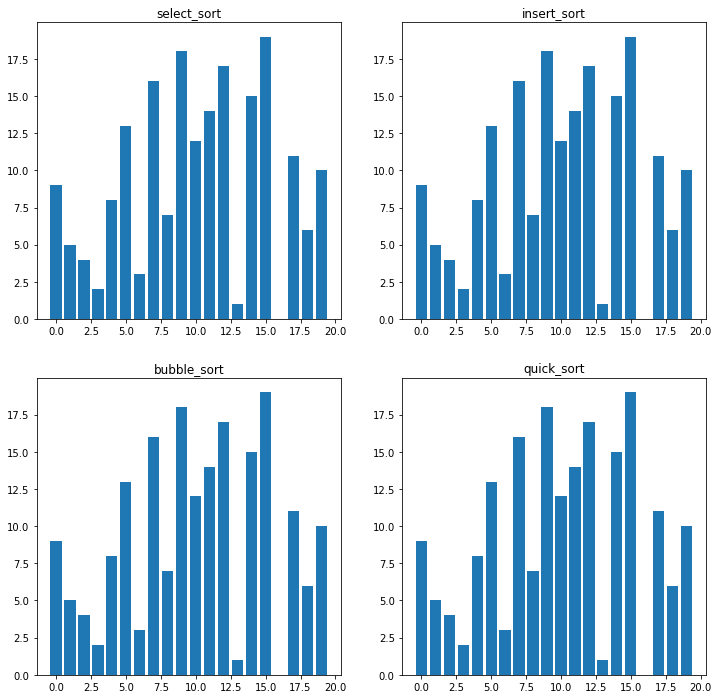

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import seaborn as sb

# 选择绘图模式
%matplotlib inline
# %matplotlib notebook
# %matplotlib auto

N = 20
dataDict = getData(N)
x = list(range(N))

fig, axs = plt.subplots(2,2, figsize=(12,12))

# for dataName, data in dataDict.items():
data = dataDict.get("random data")
sortFucIter = iter((select_sort, insert_sort, bubble_sort, quick_sort))
for row in axs:
    for ax in row:
        func = next(sortFucIter)
        ax.set_title(func.__name__)
        ax.bar(x, data)

In [13]:
dir(fig)
# data

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_axes_internal',
 '_agg_filter',
 '_align_xlabel_grp',
 '_align_ylabel_grp',
 '_alpha',
 '_animated',
 '_axobservers',
 '_axstack',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_constrained',
 '_constrained_layout_pads',
 '_contains',
 '_default_contains',
 '_dpi',
 '_gci',
 '_get_axes',
 '_get_clipping_extent_bbox',
 '_get_dpi',
 '_gid',
 '_gridspecs',
 '_in_layout',
 '_label',
 '_layoutbox',
 '_make_key',
 '_mouseover',
 '_oid',
 '_path_effects',
 '_picker',
 '_process_projection_requirements',
 '_prop_order',
 '_propobservers',
 '_rasterized',
 '_remove_ax',
 '_remove_method',
